# 데이터 가져오기

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
import re
import glob
import os

def smi_to_df (file_path):
    file = open(file_path, 'r', encoding = 'cp949')
    wholefile = file.readlines()
    pattern = re.compile(r'<SYNC Start=(\d+)><P Class=KRCC>\n(.*?)\n', re.DOTALL)
    matches = pattern.findall(''.join(wholefile))
    df = pd.DataFrame(matches, columns=['Time_Stamp(s)', 'Text'])
    df['Time_Stamp(s)'] = df['Time_Stamp(s)'].apply(lambda x: float(x)/1000)
    return df

def get_smi_file_names(path):
    smi_file_names = []
    for file in os.listdir(path):
        if file.endswith(".smi") and os.path.isfile(os.path.join(path, file)):
            smi_file_names.append(file)
    return smi_file_names

smi_file_path = "/content/drive/MyDrive/Colab Notebooks/서지나/"
smi_file_names = get_smi_file_names(smi_file_path)
df_concat = pd.DataFrame()
for file_name in smi_file_names:
    file_path = smi_file_path + file_name
    df = smi_to_df(file_path)
    df_concat = pd.concat([df_concat, df])

In [9]:
# Text를 하나의 문장으로 합치기
text = ''.join(df_concat['Text'].tolist())
text

"여러분, 반갑습니다. 확률, 통계에 반짝이는 느낌표를 찍어줄 서지나입니다. 우리 오늘 첫 번째 강의예요. 참 설레고 또 두렵기도 하죠. 그렇죠?선생님도 그랬어요. 오늘 첫 강의 찍는다고 하니까 어저께 밤에 잠이 안 오더라고요. 여러분들도 이 교재를 가지고 또 이 화면 앞에 앉아 있을 때 어떤 마음가짐으로 시작하셨나요?일단은 우리가 이 교재를 다 끝내고 났을 때 분명히 여러분들은 성장해 있을 거예요. 그렇죠. 그렇기 때문에 기대감, 그런 것들이 있을 것 같아요.그게 설렘 아닐까 싶고요. 두려운 것들은 조금 이제 접어두고요. 선생님은 이 새 교육과정에 대한 것, 여러분에게 확률, 통계를 어떻게 하면 더 잘 가르칠 수 있을지에 대해서완벽히 분석하고 또 이 문제집을 어떻게 하면 여러분들의 것으로 만들 수 있을지에 대해서 많이 고민하고 연구하고 수업을 준비했습니다.그러니까 여러분들도 선생님 따라서 믿고 이렇게 차근차근 정리해 가시면 분명히 확률, 통계에 좋은 결과 있을 거예요.우리 일단은 오늘 처음 나갈 내용은 순열과 조합에 대한 이야기를 할 거예요. 그런데 여러분들 순열과 조합이라는 거 언제 처음 배웠죠? 기억나세요?우리가 지금 수학1, 수학2 이런 걸 거쳐서 오다 보니까 이미 좀 지나간 과거 같은데 중학교 때 배우고 나서 그다음에 첫 번째 고등학교 들어와서 배우는 수1 뒷부분에순열과 조합에 대한 간단한 계산까지는 하고 왔어요. 그러면 이번에는 그 계산을 바탕으로 벌써 이제 원순열부터 시작을 해요. 여러분들 교재 처음에 딱 펴보면 알겠지만앞의 게 기억이 하나도 안 나는데 원순열, 벌써 공식을 이용해서 문제를 푸는 게 나와요. 기억이 안 나겠죠. 그래서 앞의 부분을 선생님이 정리를 해 주고 나서그다음에 이제 원순열로 들어가보도록 할게요. 가볍게 출발해 보도록 하겠습니다. 첫 내용 한번 시작해 볼게요.처음은 합의 법칙에 대한 이야기입니다. 여러분들 기억나세요? 합의 법칙과 곱의 법칙이 있었어요. 어떻게 차이가 있었더라? 그렇지, 합이라고 하는 것은 이 말이 굉장히 중요

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
from nltk import sent_tokenize
sentences = sent_tokenize(''.join(text))
sentences[:5]

['여러분, 반갑습니다.',
 '확률, 통계에 반짝이는 느낌표를 찍어줄 서지나입니다.',
 '우리 오늘 첫 번째 강의예요.',
 '참 설레고 또 두렵기도 하죠.',
 '그렇죠?선생님도 그랬어요.']

In [ ]:
sentences[2]

'지금 나오는 노래 자이언티의 꺼내먹어요라는 노래가 나와요.이 노래 좋아하는 사람들도 많이 있을 텐데 선생님도 굉장히 좋아하는 노래 중에 하나예요.'

# 존댓말 반말 분류

LABEL_0 : 반말
LABEL_1 : 존댓말

In [13]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

model = AutoModelForSequenceClassification.from_pretrained("j5ng/kcbert-formal-classifier")
tokenizer = AutoTokenizer.from_pretrained('j5ng/kcbert-formal-classifier')

formal_classifier = pipeline(task="text-classification", model=model, tokenizer=tokenizer)
print(formal_classifier(sentences[:5]))
# [{'label': 'LABEL_0', 'score': 0.9999139308929443}]


[{'label': 'LABEL_1', 'score': 0.9993060827255249}, {'label': 'LABEL_1', 'score': 0.9993060827255249}, {'label': 'LABEL_1', 'score': 0.9993059635162354}, {'label': 'LABEL_1', 'score': 0.9993059635162354}, {'label': 'LABEL_1', 'score': 0.9993060827255249}]


In [14]:
sentences_list = formal_classifier(sentences)

In [ ]:
sentences_list

[{'label': 'LABEL_1', 'score': 0.9993060827255249},
 {'label': 'LABEL_1', 'score': 0.9993060827255249},
 {'label': 'LABEL_1', 'score': 0.9993059635162354},
 {'label': 'LABEL_1', 'score': 0.9993059635162354},
 {'label': 'LABEL_1', 'score': 0.9993060827255249},
 {'label': 'LABEL_1', 'score': 0.9993058443069458},
 {'label': 'LABEL_1', 'score': 0.9993059635162354},
 {'label': 'LABEL_1', 'score': 0.9993060827255249},
 {'label': 'LABEL_1', 'score': 0.9993060827255249},
 {'label': 'LABEL_1', 'score': 0.9993059635162354},
 {'label': 'LABEL_1', 'score': 0.9993059635162354},
 {'label': 'LABEL_1', 'score': 0.9993060827255249},
 {'label': 'LABEL_1', 'score': 0.7835639119148254},
 {'label': 'LABEL_1', 'score': 0.9993059635162354},
 {'label': 'LABEL_1', 'score': 0.9993058443069458},
 {'label': 'LABEL_1', 'score': 0.9993060827255249},
 {'label': 'LABEL_1', 'score': 0.9993059635162354},
 {'label': 'LABEL_1', 'score': 0.9993060827255249},
 {'label': 'LABEL_1', 'score': 0.9993060827255249},
 {'label': '

In [34]:
formal_df.iloc[200:300]

,label,score
200,존댓말,0.999306
201,존댓말,0.999306
202,존댓말,0.999306
203,반말,0.999913
204,존댓말,0.999305
...,...,...
295,존댓말,0.999306
296,존댓말,0.999306
297,존댓말,0.999306
298,반말,0.999914


In [15]:
#LABEL_0 카운트
count = 0
for i in sentences_list:
    if i['label'] == 'LABEL_0':
        count += 1
count


9123

In [16]:
#LABEL_1 카운트
count = 0
for i in sentences_list:
    if i['label'] == 'LABEL_1':
        count += 1
count


19917

In [18]:
# LABEL_0과 LABEL_1의 카운트를 데이타프레임으로 만들기
formal_df = pd.DataFrame(sentences_list)
formal_df


,label,score
0,LABEL_1,0.999306
1,LABEL_1,0.999306
2,LABEL_1,0.999306
3,LABEL_1,0.999306
4,LABEL_1,0.999306
...,...,...
29035,LABEL_1,0.999306
29036,LABEL_1,0.999306
29037,LABEL_1,0.999306
29038,LABEL_1,0.999306


In [19]:
# LABEL_0을 반말, LABEL_1을 존댓말로 바꾸기
formal_df['label'] = formal_df['label'].replace('LABEL_0', '반말')
formal_df['label'] = formal_df['label'].replace('LABEL_1', '존댓말')
formal_df

,label,score
0,존댓말,0.999306
1,존댓말,0.999306
2,존댓말,0.999306
3,존댓말,0.999306
4,존댓말,0.999306
...,...,...
29035,존댓말,0.999306
29036,존댓말,0.999306
29037,존댓말,0.999306
29038,존댓말,0.999306


In [30]:
formal_df.to_csv('/content/drive/MyDrive/Colab Notebooks/formal.csv', index=False)

In [32]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [25]:
pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 40.5 MB/s eta 0:00:00


In [26]:
import koreanize_matplotlib

### 라벨0과 라벨1을 표로 만들어서 그걸 시각화하자

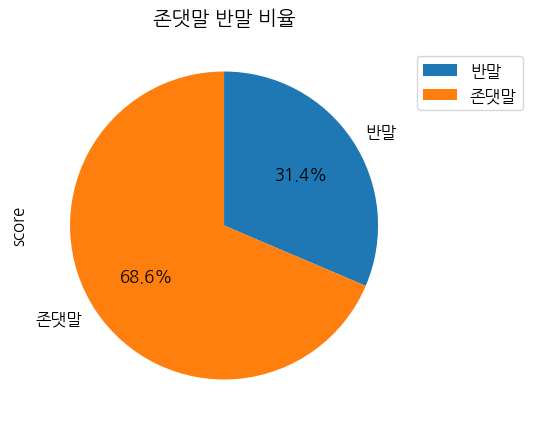

In [33]:
import matplotlib.pyplot as plt

# formal_df의 label별로 그룹화하여 카운트
formal_df.groupby('label').count()


# label별로 파이차트 그리기
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["font.size"] = 12
formal_df.groupby('label').count().plot(kind='pie', y = 'score', title='존댓말 반말 비율', autopct='%.1f%%', startangle=90, \
                                        counterclock = False, figsize=(10,5))
# LABEL_0 : 반말 / LABEL_1 : 존댓말로 표시
plt.legend(['반말', '존댓말'], loc=(1, 0.8))
plt.show()
